Goals:
- What makes a globular cluster accreted?
- What do globular clusters tell us about the formation of the Milky Way?
- How do we know if they are formed within the Milky Way?
- What other possible formation scenarios could their be and how do we identify them?

Current Goal:
- Defining which globular clusters from our data sets are accreted

Notes:
- Have access to Fe/H value and estimated age of some galaxy candidates
- We can hopefully plot these values against each other and use "In-situ vs. accretted Milky Way..." paper to compare results with and determine which ones are accretted

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io as ap

In [2]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv')
print(Harris_i)

Harris_ii = pd.read_csv('Data_Folder/HarrisPartII.csv')
print(Harris_ii)

Harris_iii = pd.read_csv('Data_FOlder/HarrisPartIII.csv')
print(Harris_iii)

Krause21 = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age', 'FeH', 'Object']) #usecols specifies specific columns
#print(Krause21)

VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv')#, usecols=['Age', 'FeH']) #usecols specifies specific columns
#print(VandenBerg)


            ID    Name           RA          DEC       L      B  R_Sun  R_gc  \
0      NGC 104  47 Tuc  00:24:05.67  -72:04:52.6  305.89 -44.89    4.5   7.4   
1      NGC 288     NaN  00:52:45.24  -26:34:57.4  152.30 -89.38    8.9  12.0   
2      NGC 362     NaN  01:03:14.26  -70:50:55.6  301.53 -46.25    8.6   9.4   
3    Whiting 1     NaN     02:02:57    -03:15:10  161.22 -60.76   30.1  34.5   
4     NGC 1261     NaN  03:12:16.21  -55:12:58.4  270.54 -52.12   16.3  18.1   
..         ...     ...          ...          ...     ...    ...    ...   ...   
152   NGC 7089     M 2  21:33:27.02  -00:49:23.7   53.37 -35.77   11.5  10.4   
153   NGC 7099    M 30  21:40:22.12  -23:10:47.5   27.18 -46.84    8.1   7.1   
154     Pal 12     NaN  21:46:38.84  -21:15:09.4   30.51 -47.68   19.0  15.8   
155     Pal 13     NaN  23:06:44.44  +12:46:19.2   87.10 -42.70   26.0  26.9   
156   NGC 7492     NaN  23:08:26.63  -15:36:41.4   53.39 -63.48   26.3  25.3   

        X     Y     Z  
0     1.9  -2.6

In [3]:
#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])

#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])


#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

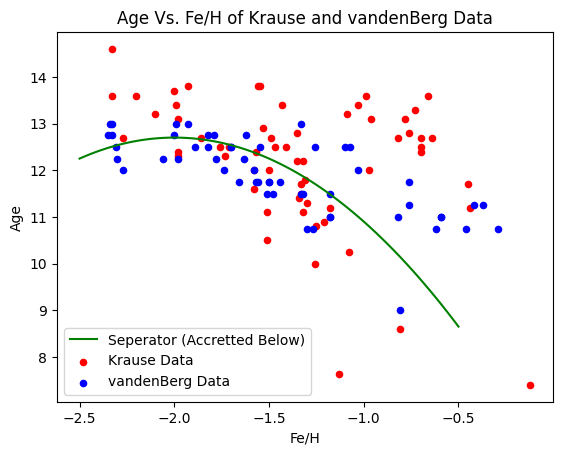

In [4]:
#Gives singular plots
#vandenBerg.plot.scatter(x="FeH", y="Age")
#Krause.plot.scatter(x="FeH", y="Age")


#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

In [30]:
#Changing columns names to be able to compare in mask
Krause21x_reset = Krause21x.rename(columns={'FeH': 'Accretted'})
Krause21y_reset = Krause21y.rename(columns={'Age': 'Accretted'})
VandenBergx_reset = VandenBergx.rename(columns={'FeH': 'Accretted'})
VandenBergy_reset = VandenBergy.rename(columns={'Age': 'Accretted'})

#Creating mask (selects all data less than created line as 'True')
mask1 = Krause21y_reset < m*(Krause21x_reset+2)**2+b 
#print(mask1)
mask2 = VandenBergy_reset < m*(VandenBergx_reset+2)**2+b
#print(mask2)

#Joining mask dataframe with object name
Krause21_FeHAge_data = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Object']).join(mask1)
#print(Krause21_FeHAge_data)
VandenBerg_FeHAge_data = pd.read_csv('Data_Folder/vandenBerg_table2.csv',usecols=['#NGC']).join(mask2)
#print(VandenBerg_FeHAge_data)

#Filtering out False values
filtered_Krause21_FeHAge_data = Krause21_FeHAge_data[Krause21_FeHAge_data.Accretted]
#print(filtered_Krause21_FeHAge_data)
filtered_VandenBerg_FeHAge_data = VandenBerg_FeHAge_data[VandenBerg_FeHAge_data.Accretted]
#print(filtered_VandenBerg_FeHAge_data)

In [29]:
Krause21_FeHAge_list = filtered_Krause21_FeHAge_data["Object"].tolist() #selecting only GC names and changing format to list
#print(Krause21_FeHAge_list)

VandenBerg_FeHAge_list = filtered_VandenBerg_FeHAge_data["#NGC"].tolist()
VandenBerg_FeHAge_list.remove("XXXX") #removing invalid names
VandenBerg_FeHAge_list.remove("XXXX") #and again

VandenBerg_FeHAge_list_modified = [] #creating empty list

#adding 'NGC' to the vandenBerg names for comparison with Krause names
for GC in VandenBerg_FeHAge_list:
    VandenBerg_FeHAge_list_modified.append("NGC" + GC)

#combining lists from Krause and vandenBerg
VandenBerg_Krause_FeHAge_list = VandenBerg_FeHAge_list_modified + Krause21_FeHAge_list

#removing duplicates
FeHAge_list = [] #creating empty list

for GC in Krause21_FeHAge_list:
    if GC not in FeHAge_list:
        FeHAge_list.append(GC)

for GC in VandenBerg_FeHAge_list_modified:
    if GC not in FeHAge_list:
        FeHAge_list.append(GC)

for GC in FeHAge_list:
    print(GC)


NGC362
NGC1261
NGC1851
NGC1904
NGC2298
NGC2808
NGC3201
NGC4833
NGC5053
NGC5272
NGC5897
NGC5904
NGC6101
NGC6139
NGC6205
NGC6535
NGC6584
NGC6715
NGC6934
NGC6981
NGC7089
Ruprecht106
Palomar12
NGC288
NGC4147
NGC4590
NGC5024
NGC5286
NGC5466
NGC5986
NGC6254
NGC6541
NGC6656
